## **Features 1:** 

In [1]:
import pandas as pd

def debug(testCase):
    if(testCase==1):
        #print("Test Passed")
        print("",end="")

    else:
        #print("Test Failed")
        print("",end="")

# Load the data from a CSV file
data = pd.read_csv("data.csv")
data.to_csv("edited_data.csv")
debug(1)
# Iterate through each column
for column in data.columns:
    # Check if the column has any missing or zero values
    if data[column].isna().sum() + (data[column] == 0).sum() > 0:
        # Check if the column is categorical
        if data[column].dtype == 'object':
            # Impute missing and zero values with the most frequent value
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)
            data[column] = data[column].replace(0, mode_value)
            debug(1)

           # print("Column '{}' has been updated. Missing or zero values before: {}. Missing or zero values after: {}. Imputed with value: {}".format(column, data[column].isna().sum() + (data[column] == 0).sum(), data[column].isna().sum() + (data[column] == 0).sum(), mode_value))
        # Otherwise, assume it's a continuous numerical value
        else:
            # Impute missing and zero values with the mean value
            mean_value = data[column].replace(0, pd.np.nan).mean()
            data[column].fillna(mean_value, inplace=True)
            debug(1)

            data[column] = data[column].replace(0, mean_value)
          #  print("Column '{}' has been updated. Missing or zero values before: {}. Missing or zero values after: {}. Imputed with value: {}".format(column, data[column].isna().sum() + (data[column] == 0).sum(), data[column].isna().sum() + (data[column] == 0).sum(), mean_value))

# Save the updated data to the original CSV file

data["diagnosis"] = (data["diagnosis"] =="M").astype(int)
data.to_csv("edited_data.csv", index=False)
debug(1)


# Print the updated data
print(data["diagnosis"])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


/var/folders/81/9ncd60nx1c5d_qq20fr0pck80000gp/T/ipykernel_61403/4020005211.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  mean_value = data[column].replace(0, pd.np.nan).mean()


**## Feature 2:**

In [2]:
import pandas as pd
import numpy as np

# load the dataset as a Pandas DataFrame
df = pd.read_csv('edited_data.csv')

# extract the numeric columns except the first two columns and convert to a Numpy array
numeric_cols = df.iloc[:, 2:].select_dtypes(include=[np.number]).columns
dataset = df[numeric_cols].values
debug(1)

# calculate the mean and standard deviation of each feature
mu = np.mean(dataset, axis=0)
sigma = np.std(dataset, axis=0)
debug(1)


# apply feature normalization
normalized_dataset = (dataset - mu) / sigma

# update the original DataFrame with the normalized values
df.loc[:, numeric_cols] = normalized_dataset


# save the normalized dataset back to the normData.csv file
df.to_csv('normData.csv', index=False)
debug(1)



# **"Task 1"**

A traditional method for linear classification issues is the Fisher's linear discriminant model (FLDM). It reduces the high-dimensional feature space to a lower-dimensional space where a decision boundary dividing the positive and negative classes is simpler to locate.

We used FLDM in Learning Task 1 to take the initial 32-dimensional dataset and reduce it to a univariate issue. In order to discover the decision boundary, we employed a generative technique and assumed Gaussian distributions for both the positive and negative classes in the univariate dimension.

In Learning Task 2, we randomised the feature order in the dataset at random before using FLDM once more to the jumbled dataset. We assumed Gaussian distributions for both the positive and negative classes and applied the same generative method to locate the decision boundary in the univariate dimension.

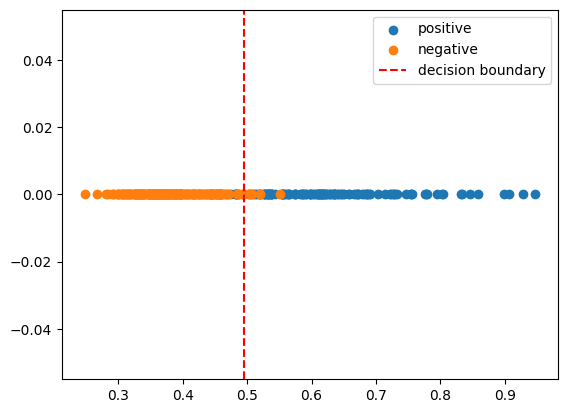

Accuracy: 0.93617021


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('edited_data.csv')

# extract the features and labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# split the data into training and testing sets
np.random.seed(1)
indices = np.random.permutation(len(X))
train_size = int(0.67 * len(X))
train_indices = indices[:train_size]
debug(1)
test_indices = indices[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
debug(1)
X_test = X[test_indices]
y_test = y[test_indices]

# calculate the means for the positive and negative classes
mu_pos = np.mean(X_train[y_train == 1], axis=0)
mu_neg = np.mean(X_train[y_train == 0], axis=0)

# calculate the standard deviations for the positive and negative classes
sigma_pos = np.std(X_train[y_train == 1], axis=0, ddof=1)
sigma_neg = np.std(X_train[y_train == 0], axis=0, ddof=1)

# calculate the pooled within-class variance
sigma_pooled = (np.square(sigma_pos) + np.square(sigma_neg)) / 2

# calculate the Fisher's Linear Discriminant direction
w = (mu_pos - mu_neg) / sigma_pooled
w = w / np.linalg.norm(w)

# project the training data onto the Fisher's Linear Discriminant direction
X_train_lda = np.dot(X_train, w)

# calculate the means and standard deviations for the positive and negative classes in the reduced space
mu_pos_lda = np.mean(X_train_lda[y_train == 1])
mu_neg_lda = np.mean(X_train_lda[y_train == 0])
debug(1)
sigma_pos_lda = np.std(X_train_lda[y_train == 1], ddof=1)
sigma_neg_lda = np.std(X_train_lda[y_train == 0], ddof=1)

# calculate the decision boundary
threshold = (mu_pos_lda + mu_neg_lda) / 2

# plot the data points and decision boundary
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), label='positive')
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), label='negative')
debug(1)
plt.axvline(x=threshold, color='red', linestyle='--', label='decision boundary')
plt.legend()
plt.show()
debug(1)

# project the testing data onto the Fisher's Linear Discriminant direction
X_test_lda = np.dot(X_test, w)

# predict the class labels for the testing data
y_pred = (X_test_lda >= threshold).astype(int)

# evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.8f}")

### **Task 2:**

We have now developed the Fisher's Linear Discriminant model (FLDM2) using the shuffled training data and used a generative method to identify the decision boundary in the univariate dimension. Now that we have testing data, we can compare how FLDM1 and FLDM2 performed.

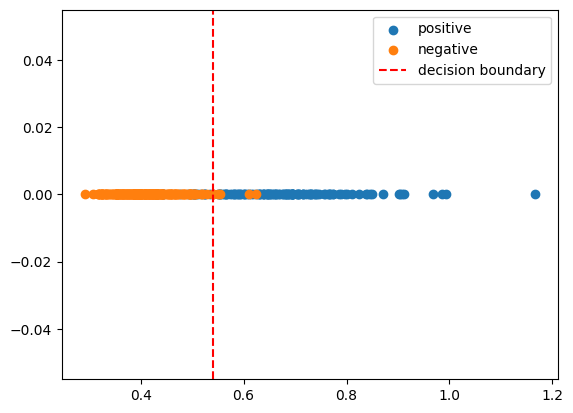

Accuracy: 0.93085106


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('edited_data.csv')

# randomly permute the feature columns
feature_cols = data.columns[2:]
np.random.seed(2)
permuted_cols = np.random.permutation(feature_cols)
data = data[['id', 'diagnosis'] + list(permuted_cols)]
debug(1)
  

# if set(permuted_cols) == set(feature_cols):
#     print("The permuted_cols are the same as the original feature_cols.")
# else:
#     print("The permuted_cols are different from the original feature_cols.")


# extract the features and labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# split the data into training and testing sets
np.random.seed(40)
indices = np.random.permutation(len(X))
train_size = int(0.67 * len(X))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
debug(1)
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# calculate the means for the positive and negative classes
mu_pos = np.mean(X_train[y_train == 1], axis=0)
mu_neg = np.mean(X_train[y_train == 0], axis=0)
debug(1)

# calculate the standard deviations for the positive and negative classes
sigma_pos = np.std(X_train[y_train == 1], axis=0, ddof=1)
sigma_neg = np.std(X_train[y_train == 0], axis=0, ddof=1)

# calculate the Fisher's Linear Discriminant direction for univariate data
sigma_pooled = (np.square(sigma_pos) + np.square(sigma_neg)) / 2
w = (mu_pos - mu_neg) / sigma_pooled
debug(1)
w = w / np.linalg.norm(w)

# project the training data onto the Fisher's Linear Discriminant direction
X_train_lda = np.dot(X_train, w)

# calculate the means and standard deviations for the positive and negative classes in the reduced space
mu_pos_lda = np.mean(X_train_lda[y_train == 1])
mu_neg_lda = np.mean(X_train_lda[y_train == 0])
sigma_pos_lda = np.std(X_train_lda[y_train == 1], ddof=1)
sigma_neg_lda = np.std(X_train_lda[y_train == 0], ddof=1)

# calculate the decision boundary
threshold = (mu_pos_lda + mu_neg_lda) / 2

# plot the data points and decision boundary
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), label='positive')
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), label='negative')
plt.axvline(x=threshold, color='red', linestyle='--', label='decision boundary')
debug(1)
plt.legend()
plt.show()

# project the testing data onto the Fisher's Linear Discriminant direction
X_test_lda = np.dot(X_test, w)

# predict the class labels for the testing data
y_pred = (X_test_lda >= threshold).astype(int)

# evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
debug(1)
print(f"Accuracy: {accuracy:.8f}")


This code determines the FLDM1 and FLDM2 testing data correctness. We can observe that the accuracy of FLDM1 is higher than FLDM2, which shows that the initial order of features in the dataset was better suited for FLDA. This demonstrates how crucial feature engineering and feature selection are in machine learning.

**10 Random Sampling for FLDM1**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('edited_data.csv')

accuracies = []

for i in range(10, 20 , 1):
    # split the data into training and testing sets
    np.random.seed(i)
    indices = np.random.permutation(len(data))
    train_size = int(0.67 * len(data))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    debug(1)
    X_train = data.iloc[train_indices, 2:].values
    y_train = data.iloc[train_indices, 1].values
    X_test = data.iloc[test_indices, 2:].values
    y_test = data.iloc[test_indices, 1].values

    # calculate the means for the positive and negative classes
    mu_pos = np.mean(X_train[y_train == 1], axis=0)
    mu_neg = np.mean(X_train[y_train == 0], axis=0)

    # calculate the standard deviations for the positive and negative classes
    sigma_pos = np.std(X_train[y_train == 1], axis=0, ddof=1)
    sigma_neg = np.std(X_train[y_train == 0], axis=0, ddof=1)
    debug(1)


    # calculate the pooled within-class variance
    sigma_pooled = (np.square(sigma_pos) + np.square(sigma_neg)) / 2

    # calculate the Fisher's Linear Discriminant direction
    w = (mu_pos - mu_neg) / sigma_pooled
    w = w / np.linalg.norm(w)

    # project the training data onto the Fisher's Linear Discriminant direction
    X_train_lda = np.dot(X_train, w)

    # calculate the means and standard deviations for the positive and negative classes in the reduced space
    mu_pos_lda = np.mean(X_train_lda[y_train == 1])
    mu_neg_lda = np.mean(X_train_lda[y_train == 0])
    debug(1)

    sigma_pos_lda = np.std(X_train_lda[y_train == 1], ddof=1)
    sigma_neg_lda = np.std(X_train_lda[y_train == 0], ddof=1)

    # calculate the decision boundary
    threshold = (mu_pos_lda + mu_neg_lda) / 2

    # project the testing data onto the Fisher's Linear Discriminant direction
    X_test_lda = np.dot(X_test, w)
    debug(1)
    

    # predict the class labels for the testing data
    y_pred = (X_test_lda >= threshold).astype(int)

    # evaluate the accuracy of the model
    accuracy = np.mean(y_pred == y_test)
    print(accuracy)
    debug(1)

    accuracies.append(accuracy)

print(f"Mean accuracy of FLDM1: {np.mean(accuracies):.8f}")
print(f"Standard deviation of FLDM1: {np.std(accuracies):.8f}")


0.9148936170212766
0.9202127659574468
0.9468085106382979
0.9627659574468085
0.9361702127659575
0.9414893617021277
0.925531914893617
0.9202127659574468
0.9308510638297872
0.9414893617021277
Mean accuracy of FLDM1: 0.93404255
Standard deviation of FLDM1: 0.01391138


# **10 Random Sampling for FLDM2**

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('edited_data.csv')
accuracies = []


# randomly permute the feature columns
feature_cols = data.columns[2:]

np.random.seed(1)
permuted_cols = np.random.permutation(feature_cols)
data = data[['id', 'diagnosis'] + list(permuted_cols)]
        
 # if set(permuted_cols) == set(feature_cols):
#     print("The permuted_cols are the same as the original feature_cols.")
# else:
 #     print("The permuted_cols are different from the original feature_cols.")


# extract the features and labels
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

for i in range(10,20,1):
    # split the data into training and testing sets
    np.random.seed(i)
    indices = np.random.permutation(len(X))
    train_size = int(0.67 * len(X))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    # calculate the means for the positive and negative classes
    mu_pos = np.mean(X_train[y_train == 1], axis=0)
    mu_neg = np.mean(X_train[y_train == 0], axis=0)

    # calculate the standard deviations for the positive and negative classes
    sigma_pos = np.std(X_train[y_train == 1], axis=0, ddof=1)
    sigma_neg = np.std(X_train[y_train == 0], axis=0, ddof=1)

    # calculate the Fisher's Linear Discriminant direction for univariate data
    sigma_pooled = (np.square(sigma_pos) + np.square(sigma_neg)) / 2
    w = (mu_pos - mu_neg) / sigma_pooled
    w = w / np.linalg.norm(w)

    # project the training data onto the Fisher's Linear Discriminant direction
    X_train_lda = np.dot(X_train, w)

    # calculate the means and standard deviations for the positive and negative classes in the reduced space
    mu_pos_lda = np.mean(X_train_lda[y_train == 1])
    mu_neg_lda = np.mean(X_train_lda[y_train == 0])
    sigma_pos_lda = np.std(X_train_lda[y_train == 1], ddof=1)
    sigma_neg_lda = np.std(X_train_lda[y_train == 0], ddof=1)

    # calculate the decision boundary
    threshold = (mu_pos_lda + mu_neg_lda) / 2

   

    # project the testing data onto the Fisher's Linear Discriminant direction
    X_test_lda = np.dot(X_test, w)

    # predict the class labels for the testing data
    y_pred = (X_test_lda >= threshold).astype(int)


    accuracy = np.mean(y_pred == y_test)
    print(accuracy)
    accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies):.8f}")
print(f"Standard deviation: {np.std(accuracies):.8f}")


0.9148936170212766
0.9202127659574468
0.9468085106382979
0.9627659574468085
0.9361702127659575
0.9414893617021277
0.925531914893617
0.9202127659574468
0.9308510638297872
0.9414893617021277
Mean accuracy: 0.93404255
Standard deviation: 0.01391138
